In [1]:
from keras.preprocessing.text import Tokenizer
import numpy as np
from string import punctuation
import numpy as np 
import re
import pandas as pd
import fasttext
import fasttext.util
import random
from itertools import permutations,combinations
from numpy.linalg import norm
import math

# Make Methods to get Most Similar and Most Distant Items From the List

In this section, I downloaded pre-trained fastText model and add item list. Later I get word vectors of a word list from a fasttext object. Finally, I get word distances of the list by cosine similarity.


### fastText

In [2]:
ft = fasttext.load_model(r'cc.tr.300.bin')


In [5]:
df = pd.read_csv("words2.txt")
liste=np.array(df).flatten()

In [6]:
def get_word_vectors(word_list, ft):
    """
    Get word vectors of a word list from a fasttext object
    """
    return np.array(list(map(ft.get_word_vector, word_list)))

In [7]:
vectors = get_word_vectors(liste, ft)


In [8]:
def cos_similarity_w_matrix(vector, matrix):
    """
    Cosine similarity of a vector to all rows of matrix
    """
    return np.dot(vector, matrix.T) / (np.linalg.norm(vector) * np.linalg.norm(matrix, axis=1))

In [9]:
def cos_sim_matrix(matrix):
    """
    Pairwise cosine similarity of all rows of matrix
    """
    cs = lambda inp : cos_similarity_w_matrix(inp, matrix)
    return np.array(list(map(cs, matrix)))

In [10]:
word_distances = cos_sim_matrix(vectors)


In [11]:
def find_furthest(k,word_distances,liste):
    """
    Find furthest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argpartition(x, k)[:k], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x: liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    #return distant_words.tolist()
    return dist_words_dict


In [12]:
def find_furthest1(k,word_distances,liste):
    """
    Find furthest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argpartition(x, k)[:k], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x: liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    return distant_words.tolist()
    #return dist_words_dict


In [13]:
#get nearest
def find_nearest(k,word_distances,liste):
    """
    Find nearest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argsort(x, axis=0)[-k:-1], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x:liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    #return distant_words.tolist()
    return dist_words_dict


In [18]:
def cosine_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_1 = np.linalg.norm(vector1)
    norm_2 = np.linalg.norm(vector2)
    return dot_product / (norm_1 * norm_2)

## Make Semantically Similar

In [19]:
buff1=[]
buff2=[]
buff3=[]
buff4=[]
buff5=[]

In [20]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [16]:
np.random.seed(1)
a1=random.choice(a)[0]
print(a1)
v[a1]

manken


['garson',
 'cansız',
 'adam',
 'vitrin',
 'erkek',
 'kız',
 'atlet',
 'ünlü',
 'kadın',
 'sanatçı']

In [21]:
for a,b in combinations(v[a1],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('garson', 'cansız', 0.1536839)
('garson', 'adam', 0.4267068)
('garson', 'vitrin', 0.2200955)
('garson', 'erkek', 0.41633064)
('garson', 'kız', 0.44422537)
('garson', 'atlet', 0.25524908)
('garson', 'ünlü', 0.2843398)
('garson', 'kadın', 0.4235237)
('garson', 'sanatçı', 0.33288124)
('cansız', 'adam', 0.23637861)
('cansız', 'vitrin', 0.18153696)
('cansız', 'erkek', 0.30193245)
('cansız', 'kız', 0.25415385)
('cansız', 'atlet', 0.18338738)
('cansız', 'ünlü', 0.2533995)
('cansız', 'kadın', 0.27744037)
('cansız', 'sanatçı', 0.23704235)
('adam', 'vitrin', 0.18406092)
('adam', 'erkek', 0.46757722)
('adam', 'kız', 0.5034469)
('adam', 'atlet', 0.29295433)
('adam', 'ünlü', 0.33576322)
('adam', 'kadın', 0.5522838)
('adam', 'sanatçı', 0.37368125)
('vitrin', 'erkek', 0.14987719)
('vitrin', 'kız', 0.124673866)
('vitrin', 'atlet', 0.14686584)
('vitrin', 'ünlü', 0.15658283)
('vitrin', 'kadın', 0.22206517)
('vitrin', 'sanatçı', 0.22989714)
('erkek', 'kız', 0.772293)
('erkek', 'atlet', 0.35688016)
('erk

In [22]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [23]:
np.random.seed(2)
a2=random.choice(a)[0]
print(a2)
v[a2]

pıhtı


['kas',
 'oksijen',
 'kalp',
 'ülser',
 'köpük',
 'peynir',
 'tortu',
 'kemik',
 'kan',
 'damar']

In [24]:
for a,b in combinations(v[a2],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('kas', 'oksijen', 0.34896508)
('kas', 'kalp', 0.5265113)
('kas', 'ülser', 0.2899086)
('kas', 'köpük', 0.2847533)
('kas', 'peynir', 0.3267617)
('kas', 'tortu', 0.17420603)
('kas', 'kemik', 0.6345605)
('kas', 'kan', 0.4411528)
('kas', 'damar', 0.5270533)
('oksijen', 'kalp', 0.36663246)
('oksijen', 'ülser', 0.18245295)
('oksijen', 'köpük', 0.36340183)
('oksijen', 'peynir', 0.2863277)
('oksijen', 'tortu', 0.26754034)
('oksijen', 'kemik', 0.30258685)
('oksijen', 'kan', 0.4820745)
('oksijen', 'damar', 0.37026784)
('kalp', 'ülser', 0.3589919)
('kalp', 'köpük', 0.27661774)
('kalp', 'peynir', 0.26222962)
('kalp', 'tortu', 0.17736265)
('kalp', 'kemik', 0.48511493)
('kalp', 'kan', 0.43764475)
('kalp', 'damar', 0.6363034)
('ülser', 'köpük', 0.22475821)
('ülser', 'peynir', 0.27984044)
('ülser', 'tortu', 0.31086203)
('ülser', 'kemik', 0.30071652)
('ülser', 'kan', 0.24806693)
('ülser', 'damar', 0.4092431)
('köpük', 'peynir', 0.35236764)
('köpük', 'tortu', 0.4464139)
('köpük', 'kemik', 0.3160354)
('k

In [25]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [26]:
np.random.seed(3)
a3=random.choice(a)[0]
print(a3)
v[a3]

süngü


['tornavida',
 'mayın',
 'düşman',
 'çekiç',
 'zıpkın',
 'barut',
 'tabanca',
 'mızrap',
 'bıçak',
 'mızrak']

In [27]:
for a,b in combinations(v[a3],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('tornavida', 'mayın', 0.16504613)
('tornavida', 'düşman', 0.14338468)
('tornavida', 'çekiç', 0.48687595)
('tornavida', 'zıpkın', 0.33439058)
('tornavida', 'barut', 0.22955278)
('tornavida', 'tabanca', 0.43428376)
('tornavida', 'mızrap', 0.2944047)
('tornavida', 'bıçak', 0.5063734)
('tornavida', 'mızrak', 0.2953616)
('mayın', 'düşman', 0.38573578)
('mayın', 'çekiç', 0.22403325)
('mayın', 'zıpkın', 0.2649863)
('mayın', 'barut', 0.3490789)
('mayın', 'tabanca', 0.31854)
('mayın', 'mızrap', 0.2434302)
('mayın', 'bıçak', 0.25772595)
('mayın', 'mızrak', 0.29887864)
('düşman', 'çekiç', 0.16701344)
('düşman', 'zıpkın', 0.21145436)
('düşman', 'barut', 0.20092662)
('düşman', 'tabanca', 0.27438182)
('düşman', 'mızrap', 0.12354954)
('düşman', 'bıçak', 0.24007034)
('düşman', 'mızrak', 0.28218248)
('çekiç', 'zıpkın', 0.38950574)
('çekiç', 'barut', 0.25955468)
('çekiç', 'tabanca', 0.43526953)
('çekiç', 'mızrap', 0.40896016)
('çekiç', 'bıçak', 0.53046095)
('çekiç', 'mızrak', 0.43680552)
('zıpkın', 'ba

In [34]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [35]:
np.random.seed(4)
a4=random.choice(a)[0]
print(a4)
v[a4]

geçerlik


['muafiyet',
 'başvuru',
 'deneyim',
 'sınav',
 'önem',
 'güven',
 'yetenek',
 'başarı',
 'ehliyet',
 'uygunluk']

In [36]:
for a,b in combinations(v[a4],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('muafiyet', 'başvuru', 0.42001164)
('muafiyet', 'deneyim', 0.2404232)
('muafiyet', 'sınav', 0.34024933)
('muafiyet', 'önem', 0.22314426)
('muafiyet', 'güven', 0.24206416)
('muafiyet', 'yetenek', 0.27179256)
('muafiyet', 'başarı', 0.38931417)
('muafiyet', 'ehliyet', 0.32153487)
('muafiyet', 'uygunluk', 0.37608847)
('başvuru', 'deneyim', 0.29555348)
('başvuru', 'sınav', 0.5187373)
('başvuru', 'önem', 0.23284738)
('başvuru', 'güven', 0.18511657)
('başvuru', 'yetenek', 0.2726228)
('başvuru', 'başarı', 0.3053881)
('başvuru', 'ehliyet', 0.333009)
('başvuru', 'uygunluk', 0.34982327)
('deneyim', 'sınav', 0.26937935)
('deneyim', 'önem', 0.33287746)
('deneyim', 'güven', 0.39715394)
('deneyim', 'yetenek', 0.47711968)
('deneyim', 'başarı', 0.4146964)
('deneyim', 'ehliyet', 0.3259607)
('deneyim', 'uygunluk', 0.36522713)
('sınav', 'önem', 0.17251769)
('sınav', 'güven', 0.18311343)
('sınav', 'yetenek', 0.34375525)
('sınav', 'başarı', 0.41455907)
('sınav', 'ehliyet', 0.4685849)
('sınav', 'uygunluk', 

In [39]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [40]:
np.random.seed(5)
a5=random.choice(a)[0]
print(a5)
v[a5]

payda


['kısım',
 'taban',
 'terslik',
 'evrensel',
 'formül',
 'değer',
 'gerçeklik',
 'anlayış',
 'eşit',
 'amaç']

In [41]:
for a,b in combinations(v[a5],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('kısım', 'taban', 0.31804162)
('kısım', 'terslik', 0.20147318)
('kısım', 'evrensel', 0.14393163)
('kısım', 'formül', 0.24059427)
('kısım', 'değer', 0.22624159)
('kısım', 'gerçeklik', 0.24036475)
('kısım', 'anlayış', 0.23587345)
('kısım', 'eşit', 0.19465567)
('kısım', 'amaç', 0.25280246)
('taban', 'terslik', 0.04003116)
('taban', 'evrensel', 0.21750917)
('taban', 'formül', 0.25204143)
('taban', 'değer', 0.21307136)
('taban', 'gerçeklik', 0.29492638)
('taban', 'anlayış', 0.2586592)
('taban', 'eşit', 0.23636486)
('taban', 'amaç', 0.22051458)
('terslik', 'evrensel', 0.22911568)
('terslik', 'formül', 0.19502045)
('terslik', 'değer', 0.21361071)
('terslik', 'gerçeklik', 0.31166998)
('terslik', 'anlayış', 0.2713324)
('terslik', 'eşit', 0.14747515)
('terslik', 'amaç', 0.2899061)
('evrensel', 'formül', 0.27942607)
('evrensel', 'değer', 0.3701899)
('evrensel', 'gerçeklik', 0.42101452)
('evrensel', 'anlayış', 0.4455154)
('evrensel', 'eşit', 0.38002884)
('evrensel', 'amaç', 0.3569)
('formül', 'de

## Make Semantically Dissimilar

To make a semantically dissimilar words list, define a condition in which the loop stops until reach the new list reaches "list_length" length. Create a new list by adding items from the list, and items are added according to "word_distances" but randomly choose items from the list of the first five most distant items. If the pairwise combination of items of the list of cosine similarity is higher than 0.15, I add them to a list (temp), then turn the list to a set (due to sets having unique items but no copy of it), then get the difference from the set which of all item to set which have items which have higher than 0.15 cosine similarity concerning pairwise combination

In [62]:
def random_dist_creator(word_distances,liste,list_length,threshold=0.15):
    temp9=[]
    temp=[]
    u=[]
    temp9.append(liste[np.argpartition(word_distances[random.randint(0,len(liste))],
                                                                random.randint(0,5))[random.randint(0,5)]])
   
    while True:
        if (len(u)==list_length):
            break
        a= random.randint(0,len(liste))
        b= random.randint(0,5)

        index=np.argpartition(word_distances[a], b)[b]          
        temp9.append(liste[index])
        for a,b in combinations(temp9,2):
            if(threshold<cosine_sim(ft[a],ft[b])):
                temp.append(a)
        u=list(set(temp9) - set(temp))
    return u

In [57]:
p=random_dist_creator(word_distances,liste,10,0.22)
p

['soytarı',
 'tabure',
 'nakavt',
 'ağarma',
 'sondaj',
 'izlenim',
 'muson',
 'peşinat',
 'boza',
 'lehçe']

In [58]:
for a,b in combinations(p,2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('soytarı', 'tabure', 0.14455254)
('soytarı', 'nakavt', 0.13422199)
('soytarı', 'ağarma', 0.010365224)
('soytarı', 'sondaj', 0.047114883)
('soytarı', 'izlenim', 0.02700087)
('soytarı', 'muson', 0.12143058)
('soytarı', 'peşinat', -0.04558849)
('soytarı', 'boza', 0.12416706)
('soytarı', 'lehçe', 0.1489039)
('tabure', 'nakavt', 0.0888601)
('tabure', 'ağarma', 0.14693369)
('tabure', 'sondaj', 0.12937437)
('tabure', 'izlenim', 0.053701058)
('tabure', 'muson', 0.01062541)
('tabure', 'peşinat', 0.11758899)
('tabure', 'boza', 0.14467171)
('tabure', 'lehçe', 0.028319964)
('nakavt', 'ağarma', 0.056440677)
('nakavt', 'sondaj', 0.08723034)
('nakavt', 'izlenim', 0.048534676)
('nakavt', 'muson', 0.14481653)
('nakavt', 'peşinat', 0.089696616)
('nakavt', 'boza', 0.074704655)
('nakavt', 'lehçe', 0.09668135)
('ağarma', 'sondaj', 0.16018821)
('ağarma', 'izlenim', 0.105664656)
('ağarma', 'muson', 0.13551085)
('ağarma', 'peşinat', 0.07230286)
('ağarma', 'boza', 0.12389574)
('ağarma', 'lehçe', 0.13424627)
(

In [66]:
# crate 80 items that include each list's item less than 0.15
res=[]
i=0
while i<5:
    res.append(random_dist_creator(word_distances,liste,10,0.22))
    i=i+1


In [67]:
res

[['ibre',
  'matara',
  'öncülük',
  'çalıntı',
  'fobi',
  'ibraz',
  'çeyiz',
  'adres',
  'sohbet',
  'müşfik'],
 ['cılık',
  'uyum',
  'elem',
  'hayta',
  'otel',
  'faks',
  'ibrik',
  'çıkıntı',
  'ibare',
  'payda'],
 ['imza',
  'şüphe',
  'zakkum',
  'abajur',
  'avare',
  'gıcırtı',
  'punto',
  'sezon',
  'koç',
  'müşfik'],
 ['abaküs',
  'adele',
  'röfle',
  'aforoz',
  'muson',
  'kepenk',
  'garanti',
  'adak',
  'külot',
  'paragraf'],
 ['yorum',
  'içtenlik',
  'köşk',
  'eczane',
  'punto',
  'hısım',
  'gram',
  'afiyet',
  'çöküş',
  'serseri']]

# Stats and Graphs

In [68]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt


get cosine similarity values of similar lists and dissimilar lists.

first get similar ones

In [69]:
for a,b in combinations(v[a1],2):
  buff1.append(cosine_sim(ft[a],ft[b]))

In [70]:
for a,b in combinations(v[a2],2):
  buff2.append(cosine_sim(ft[a],ft[b]))

In [71]:
for a,b in combinations(v[a3],2):
  buff3.append(cosine_sim(ft[a],ft[b]))

In [72]:
for a,b in combinations(v[a4],2):
  buff4.append(cosine_sim(ft[a],ft[b]))

In [73]:
for a,b in combinations(v[a5],2):
  buff5.append(cosine_sim(ft[a],ft[b]))

then get dissimilar ones

In [74]:
buff6=[]
buff7=[]
buff8=[]
buff9=[]
buff10=[]

In [75]:
for a,b in combinations(res[0],2):
  buff6.append(cosine_sim(ft[a],ft[b]))

In [76]:
for a,b in combinations(res[1],2):
  buff7.append(cosine_sim(ft[a],ft[b]))

In [77]:
for a,b in combinations(res[2],2):
  buff8.append(cosine_sim(ft[a],ft[b]))

In [78]:
for a,b in combinations(res[3],2):
  buff9.append(cosine_sim(ft[a],ft[b]))

In [79]:
for a,b in combinations(res[4],2):
  buff10.append(cosine_sim(ft[a],ft[b]))

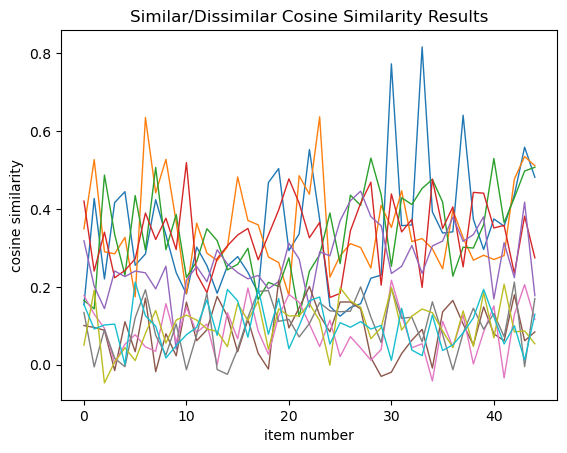

In [80]:
#graphs
a= buff1 # similar
b=buff2
c=buff3
d=buff4
e=buff5

f= buff6 # dissimilar
g=buff7
h=buff8
j=buff9
k=buff10


fig, ax = plt.subplots()

plt.xlabel('item number') 
plt.ylabel('cosine similarity') 
plt.title("Similar/Dissimilar Cosine Similarity Results")


ax.plot(a,linewidth=1.0)
ax.plot(b,linewidth=1.0)
ax.plot(c,linewidth=1.0)
ax.plot(d,linewidth=1.0)
ax.plot(e,linewidth=1.0)

ax.plot(f,linewidth=1.0)
ax.plot(g,linewidth=1.0)
ax.plot(h,linewidth=1.0)
ax.plot(j,linewidth=1.0)
ax.plot(k,linewidth=1.0)






plt.show()

In [81]:
similar=[]
similar=[a,b,c,d,e]
similar= np.array(similar)
similar=similar.flatten()


dissimilar=[]
dissimilar=[f,g,h,j,k]
dissimilar= np.array(dissimilar)
dissimilar=dissimilar.flatten()


In [82]:
stat, p = mannwhitneyu(similar, dissimilar)
print('Statistics=%.3f, p=%.2f' % (stat, p))

Statistics=49578.000, p=0.00
